# **Logistic Regression**

In [0]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim

import nltk
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer

from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup


In [0]:
RANDOM_SEED = 123
DEVICE = "cuda"
ly = pd.read_csv("4_19_lyrics_with_tags.csv", delimiter = ",", dtype = {'lyrics':str})
#ly = ly[ly.tags != "rock"]
#ly = ly[ly.tags != "pop"]

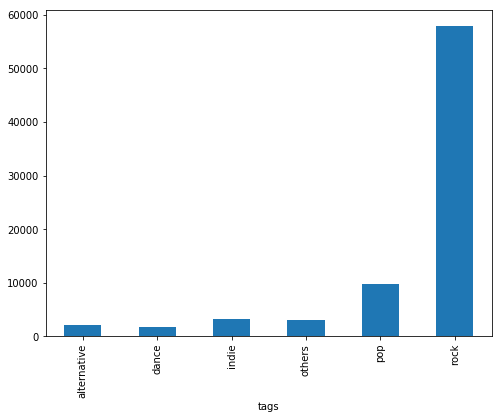

In [0]:
fig = plt.figure(figsize=(8,6))
ly.groupby('tags').lyrics.count().plot.bar(ylim=0)
plt.show()

In [0]:
len(ly)

77885

In [3]:
import nltk
nltk.download('stopwords')
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;|\n]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
lyrics = ly["lyrics"]
def clean_text(text):
    """
        text: a string
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
lyrics = lyrics.apply(clean_text)
ly["lyrics"]=lyrics


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
X = ly.lyrics
y = ly.tags
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42) # use random number generator

In [23]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, multi_class = "multinomial", 
                                           C=100000, solver = "sag", class_weight="balanced")),
               ])

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
my_tags = ["rock","pop","indie", "dance","alternative","others"]
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

#Precision is the number of document retrieved that are relevant
#Recall is the number of relevant document that are retrieved.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


accuracy 0.5456646409312677
              precision    recall  f1-score   support

        rock       0.04      0.05      0.05       639
         pop       0.05      0.07      0.06       498
       indie       0.08      0.11      0.09      1001
       dance       0.05      0.07      0.06       933
 alternative       0.20      0.29      0.24      2883
      others       0.77      0.67      0.72     17412

   micro avg       0.55      0.55      0.55     23366
   macro avg       0.20      0.21      0.20     23366
weighted avg       0.61      0.55      0.57     23366



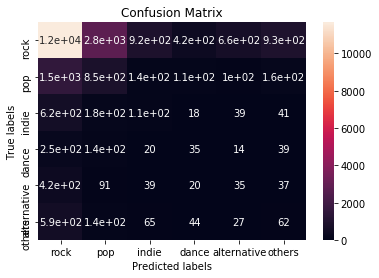

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt     


cm = confusion_matrix(y_test, y_pred, my_tags)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(my_tags); ax.yaxis.set_ticklabels(my_tags);